# LR_ Years of experience and Salary

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Data taken from https://www.geeksforgeeks.org/machine-learning/dataset-for-linear-regression/
data = pd.read_csv('/content/Salary_Data[1].csv')

In [ ]:
# Drop all the columns uninteresting
df = data.drop(columns=['Age', 'Gender','Education Level','Job Title'])
print(df.shape)

(6704, 2)


In [ ]:
# # eliminate rows with at least one NaN
df = df.dropna()
print(df.shape)

(6699, 2)


In [ ]:
# Simplify the df
df_avg = df.groupby('Years of Experience').mean().reset_index()
print(df_avg.shape)

(37, 2)


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Create a column transformer. Designed for transforming input features
ct = make_column_transformer(
    (MinMaxScaler(), ["Years of Experience"]))
ty = MinMaxScaler()

# Create X & y
X = df_avg.drop("Salary", axis=1)
y = df_avg["Salary"]# es un df

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Fit the column transformer to our training data
ct.fit(X_train)
ty.fit(y_train.values.reshape(-1, 1))

# Transform training and test data with normalization (MinMaxScaler)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
y_train_normal = ty.transform(y_train.values.reshape(-1, 1))
y_test_normal = ty.transform( y_test.values.reshape(-1, 1))


In [ ]:
# Data before
X_train.loc[0]

,0
Years of Experience,0.0


In [ ]:
# Create the model
tf.random.set_seed(29)

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(75),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model
history = model.fit(X_train_normal, y_train_normal, epochs=200, verbose=0)

In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 680 (2.66 KB)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 454 (1.78 KB)

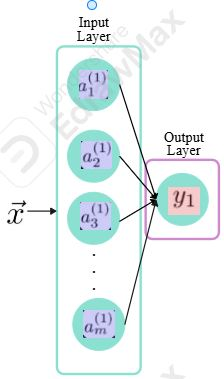

Text(0.5, 0, 'epochs')

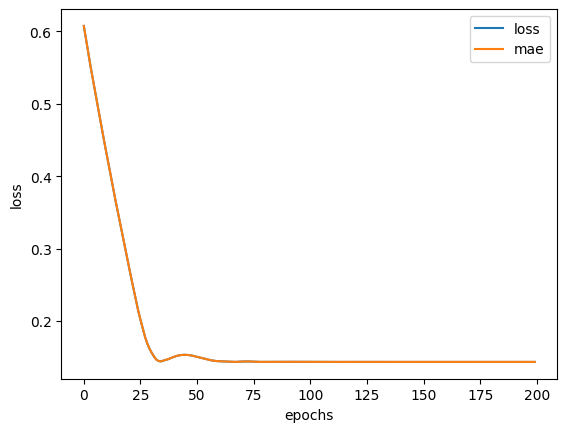

In [ ]:
# Plot learning curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Make some predictions
y_pred = model.predict(X_test_normal)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [ ]:
# Evaluate the model on the test
print('Final mae training: ', model.evaluate(X_train_normal, y_train_normal))
print('Final mae test: ',model.evaluate(X_test_normal, y_test_normal))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 0.1436 - mae: 0.1436
Final mae training:  [0.14359983801841736, 0.14359983801841736]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1109 - mae: 0.1109
Final mae test:  [0.11085780709981918, 0.11085780709981918]


In [ ]:
# Plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred,
                     extra_data=None,
                     predict_extra_data=None):
  plt.figure(figsize=(10, 7))
  # Plot training data in black
  plt.scatter(train_data, train_labels, c="k", label="Training data")
  # Plot testing data in blue
  plt.scatter(test_data, test_labels, c="b", label="Testing data")
  # Plot model's predictions in magenta
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  if extra_data is not None:
    plt.scatter(extra_data, predict_extra_data, c="g", label="Specific values")
  # Show the legend
  plt.legend()
  # set the axes titles
  plt.ylabel("Salary")
  plt.xlabel("Years of experience")

  """ Function adapted/taken from:Tensorflow and DL with Python https://www.youtube.com/watch?v=tpCFfeUEGs8&ab_channel=DanielBourke"""

In [ ]:
# Evaluating especific values
specific_years = np.array([[33]])
# since the model was trained in normalized data, these values must be normalized as well.
predict_specific_years = ct.named_transformers_['minmaxscaler'].transform(specific_years)
predict_specific_years

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.97058824]])

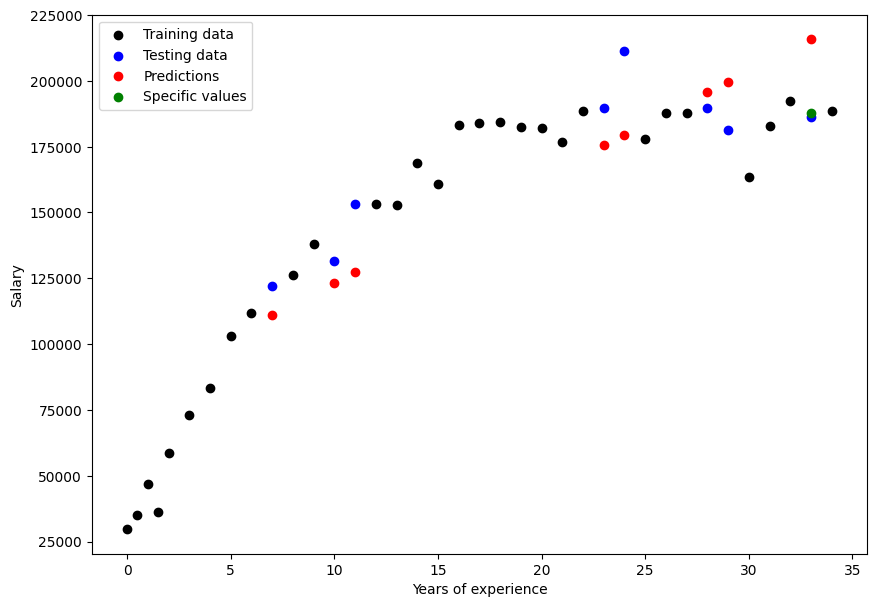

In [ ]:
# inverse_transform your normalized data back to their original scale
plot_predictions(train_data=ct.named_transformers_['minmaxscaler'].inverse_transform(X_train_normal),
                 train_labels=ty.inverse_transform(y_train_normal),# For y I instanciated a obj and then I used the method .inverse_transform
                 test_data=ct.named_transformers_['minmaxscaler'].inverse_transform(X_test_normal),# for the feature x I did not instanciate a obj so beggining from the
                 #ct I look for the MinMaxScaler and then use its inverse_transform method.
                 test_labels=ty.inverse_transform(y_test_normal),
                 predictions=ty.inverse_transform(y_pred),
                 extra_data=specific_years,
                 predict_extra_data= ty.inverse_transform(predict_specific_years))